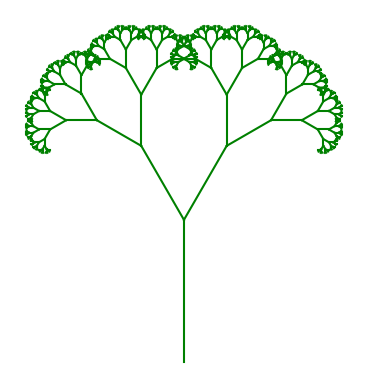

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def draw_tree(x, y, angle, depth, ax, length=1.0, factor=0.6):
    if depth == 0:
        return
    x2 = x + length * np.cos(angle)
    y2 = y + length * np.sin(angle)
    ax.plot([x, x2], [y, y2], color="green")
    draw_tree(x2, y2, angle - np.pi/6, depth-1, ax, length * factor, factor)
    draw_tree(x2, y2, angle + np.pi/6, depth-1, ax, length * factor, factor)

def arvore_fractal_plot():
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.axis('off')
    draw_tree(0, 0, np.pi/2, 10, ax)
    plt.show()

arvore_fractal_plot()


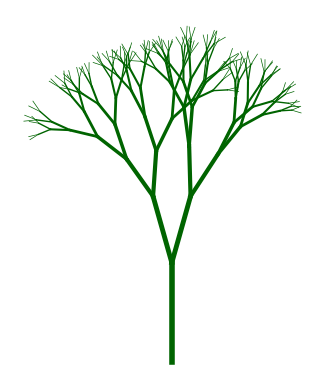

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import random

def draw_random_tree(x, y, angle, depth, ax, length=1.0, factor=0.75, angle_var=15):
    if depth == 0:
        return
    angle_rad = np.radians(angle)
    x2 = x + length * np.cos(angle_rad)
    y2 = y + length * np.sin(angle_rad)
    ax.plot([x, x2], [y, y2], color="darkgreen", linewidth=depth*0.5)

    # Variação aleatória nos ângulos
    delta_angle = random.uniform(angle_var - 10, angle_var + 10)
    new_factor = random.uniform(factor - 0.1, factor + 0.1)

    draw_random_tree(x2, y2, angle - delta_angle, depth-1, ax, length * new_factor, factor, angle_var)
    draw_random_tree(x2, y2, angle + delta_angle, depth-1, ax, length * new_factor, factor, angle_var)

def arvore_aleatoria(depth=8):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.axis('off')
    draw_random_tree(0, 0, 90, depth, ax)
    plt.show()

arvore_aleatoria()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

def lsystem(axiom, rules, iterations):
    for _ in range(iterations):
        axiom = ''.join([rules.get(c, c) for c in axiom])
    return axiom

def draw_lsystem(instructions, angle=25, length=5):
    stack = []
    x, y = 0, 0
    current_angle = 90
    lines = []

    for cmd in instructions:
        if cmd == 'F':
            x2 = x + length * math.cos(math.radians(current_angle))
            y2 = y + length * math.sin(math.radians(current_angle))
            lines.append(((x, y), (x2, y2)))
            x, y = x2, y2
        elif cmd == '+':
            current_angle += angle
        elif cmd == '-':
            current_angle -= angle
        elif cmd == '[':
            stack.append((x, y, current_angle))
        elif cmd == ']':
            x, y, current_angle = stack.pop()

    return lines

def plot_lsystem(lines):
    fig, ax = plt.subplots(figsize=(8, 8))
    for (x1, y1), (x2, y2) in lines:
        ax.plot([x1, x2], [y1, y2], color="forestgreen", linewidth=1)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

def arvore_lsystem():
    axiom = "X"
    rules = {
    "X": "F-[[X]+X]+F[+FX]-X",
    "F": "FF"
}

    iterations = 8      # ajuste aqui
    angle = 15          # ajuste aqui
    length = 2         # ajuste aqui

    instructions = lsystem(axiom, rules, iterations)
    lines = draw_lsystem(instructions, angle, length)
    plot_lsystem(lines)

# arvore_lsystem()

In [2]:
from lsystem_presets import get_lsystem


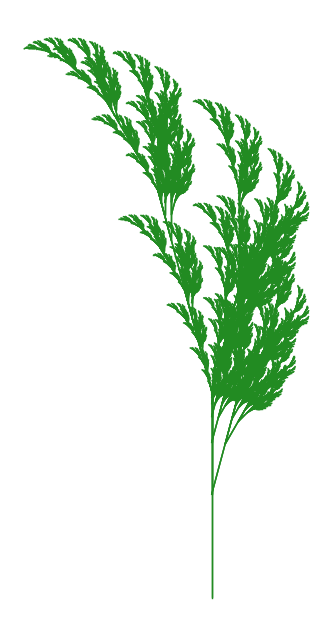

In [3]:
params = get_lsystem("Samambaia 2 (Fractal Fern)")
instructions = lsystem(params["axiom"], params["rules"], params["iterations"])
lines = draw_lsystem(instructions, params["angle"], params["length"])
plot_lsystem(lines)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image
from io import BytesIO
from lsystem_presets import get_lsystem

def lsystem(axiom, rules, iterations):
    for _ in range(iterations):
        axiom = ''.join([rules.get(c, c) for c in axiom])
    return axiom

def draw_lsystem(instructions, angle=25, length=5):
    stack = []
    x, y = 0, 0
    current_angle = 90
    lines = []

    for cmd in instructions:
        if cmd == 'F':
            x2 = x + length * math.cos(math.radians(current_angle))
            y2 = y + length * math.sin(math.radians(current_angle))
            lines.append(((x, y), (x2, y2)))
            x, y = x2, y2
        elif cmd == '+':
            current_angle += angle
        elif cmd == '-':
            current_angle -= angle
        elif cmd == '[':
            stack.append((x, y, current_angle))
        elif cmd == ']':
            x, y, current_angle = stack.pop()
    return lines

def pad_to_square(img: Image.Image, bg_color=255) -> Image.Image:
    width, height = img.size
    if width == height:
        return img
    size = max(width, height)
    new_img = Image.new("L", (size, size), color=bg_color)
    offset = ((size - width) // 2, (size - height) // 2)
    new_img.paste(img, offset)
    return new_img

def generate_lsystem_image_pil(name="Samambaia (Fractal Fern)", dpi=300, figsize=(8, 8), binarize=False):
    params = get_lsystem(name)
    if not params:
        raise ValueError("Nome de fractal inválido")

    instructions = lsystem(params["axiom"], params["rules"], params["iterations"])
    lines = draw_lsystem(instructions, params["angle"], params["length"])

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    for (x1, y1), (x2, y2) in lines:
        ax.plot([x1, x2], [y1, y2], color="black", linewidth=0.5)

    ax.set_aspect('equal')
    ax.axis('off')
    fig.patch.set_facecolor('white')

    buf = BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    buf.seek(0)

    img = Image.open(buf).convert("L")  # escala de cinza
    img = pad_to_square(img)  # aplica padding

    if binarize:
        threshold = 200
        img = img.point(lambda p: 0 if p < threshold else 255, mode='1')

    return img

In [5]:
# params = get_lsystem("Samambaia 2 (Fractal Fern)")
img = generate_lsystem_image_pil("Samambaia 2 (Fractal Fern)")
img.show()

In [7]:
from utils import contar_caixas_numpy

In [13]:
largura, altura = img.size
subdivs = np.geomspace(largura/4,largura, num=100, dtype=int)
tam_lados, num_caixas = contar_caixas_numpy(img, subdivs, limiar=128, modo='preto')
log_inv_eps = np.log(subdivs) 
log_N = np.log(num_caixas)
coef, _ = np.polyfit(log_inv_eps, log_N, 1)
coef

np.float64(1.6853263241269616)

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image
from io import BytesIO
from lsystem_presets import get_lsystem

def lsystem(axiom, rules, iterations):
    for _ in range(iterations):
        axiom = ''.join([rules.get(c, c) for c in axiom])
    return axiom

def draw_lsystem_variable_width(instructions, angle=25, length=5, base_width=3):
    stack = []
    x, y = 0, 0
    current_angle = 90
    lines = []
    widths = []
    depth = 0

    for cmd in instructions:
        if cmd == 'F':
            x2 = x + length * math.cos(math.radians(current_angle))
            y2 = y + length * math.sin(math.radians(current_angle))
            lines.append(((x, y), (x2, y2)))
            width = max(0.3, base_width * (0.7 ** depth))  # evita sumir
            widths.append(width)
            x, y = x2, y2
        elif cmd == '+':
            current_angle += angle
        elif cmd == '-':
            current_angle -= angle
        elif cmd == '[':
            stack.append((x, y, current_angle, depth))
            depth += 1
        elif cmd == ']':
            x, y, current_angle, depth = stack.pop()

    return lines, widths

def pad_to_square(img: Image.Image, bg_color=255) -> Image.Image:
    width, height = img.size
    if width == height:
        return img
    size = max(width, height)
    new_img = Image.new("L", (size, size), color=bg_color)
    offset = ((size - width) // 2, (size - height) // 2)
    new_img.paste(img, offset)
    return new_img

def generate_lsystem_image_pil(name="Samambaia (Fractal Fern)", dpi=300, figsize=(8, 8), binarize=False):
    params = get_lsystem(name)
    if not params:
        raise ValueError("Nome de fractal inválido")

    instructions = lsystem(params["axiom"], params["rules"], params["iterations"])
    lines, widths = draw_lsystem_variable_width(
        instructions,
        angle=params["angle"],
        length=params["length"]
    )

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    for ((x1, y1), (x2, y2)), w in zip(lines, widths):
        ax.plot([x1, x2], [y1, y2], color="black", linewidth=w)

    ax.set_aspect('equal')
    ax.axis('off')
    fig.patch.set_facecolor('white')

    buf = BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    buf.seek(0)

    img = Image.open(buf).convert("L")
    img = pad_to_square(img)

    if binarize:
        threshold = 200
        img = img.point(lambda p: 0 if p < threshold else 255, mode='1')

    return img

In [58]:
img = generate_lsystem_image_pil()
img.show()